# Project: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This report discusses the information coming from a dataset about 110.527 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row of the dataset. The report addresses some correlations found during data interpretation and trying to answer some interesting questions, shown below.


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will check the data cleanliness, making sure that it is ready for analysis.

### General Properties

In [37]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
#loading and exploring the data
df = pd.read_csv("KaggleV2-May-2016.csv")
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [39]:
df.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [40]:
df.shape

(110527, 14)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


No null data are found

In [42]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning

In [43]:
#editing column title
df.rename(columns={"Hipertension": "Hypertension"}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [44]:
#correcting negative age values
age_error = df[df["Age"] < 0]
df.drop(age_error.index, inplace=True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The minimum age is zero now

In [45]:
df.duplicated().sum()

0

No duplicate rows are found

In [46]:
df["PatientId"].duplicated().sum()

48228

A large percentage of the data refers to the same patients 

In [47]:
for col in df.columns:
    print(f"{col}:", df[["PatientId", col]].duplicated().sum() == df["PatientId"].duplicated().sum())

PatientId: True
AppointmentID: False
Gender: True
ScheduledDay: False
AppointmentDay: False
Age: False
Neighbourhood: True
Scholarship: True
Hypertension: True
Diabetes: True
Alcoholism: True
Handcap: True
SMS_received: False
No-show: False


A different number of duplicates from the PatientId duplicates refers to
<ol>
    <li> The same patient got different appointments at different dates
    <li> Patients are normally getting older
    <li> The same patient sometimes receives SMS and other times does not
    <li> The same patient has different no-show actions

In [48]:
#separating the dataframe into two dataframes, the first for patients with different no-show actions and the second for
#patients with constant no-show actions
#df_vary will refer to the first group of patients, while df_const will refer to the second
group = df.groupby("PatientId")["No-show"].value_counts()
group_df = group.unstack(level=1)
group_df.fillna(0, inplace=True)
group_df["Difference"] = group_df["No"] - group_df["Yes"]
group_df

No-show,No,Yes,Difference
PatientId,,,
3.921784e+04,1.0,0.0,1.0
4.374176e+04,1.0,0.0,1.0
9.377953e+04,1.0,0.0,1.0
1.417242e+05,1.0,0.0,1.0
5.376153e+05,1.0,0.0,1.0
...,...,...,...
9.999320e+14,5.0,0.0,5.0
9.999350e+14,1.0,0.0,1.0
9.999465e+14,1.0,0.0,1.0


In [49]:
group_df_vary = group_df[(group_df["Difference"] != group_df["No"]) & (group_df["No"] != 0)]
group_df_vary

No-show,No,Yes,Difference
PatientId,,,
6.485121e+07,1.0,1.0,0.0
8.799645e+07,1.0,1.0,0.0
1.421333e+08,1.0,1.0,0.0
2.515415e+08,3.0,1.0,2.0
3.557441e+08,1.0,1.0,0.0
...,...,...,...
9.986957e+14,1.0,2.0,-1.0
9.988130e+14,1.0,1.0,0.0
9.994717e+14,2.0,1.0,1.0


In [50]:
#now we get the fist dataframe
df_vary = df[df.PatientId.isin(group_df_vary.index)]
df_vary

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
21,1.215484e+13,5628338,F,2016-04-27T10:50:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0,Yes
27,1.215484e+13,5628345,F,2016-04-27T10:51:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0,No
37,1.578132e+12,5637986,F,2016-04-29T07:35:56Z,2016-04-29T00:00:00Z,64,TABUAZEIRO,1,1,1,0,0,0,No
47,5.894585e+11,5633116,F,2016-04-28T08:51:26Z,2016-04-29T00:00:00Z,39,MARUÍPE,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110516,6.923772e+13,5780205,F,2016-06-07T07:45:16Z,2016-06-08T00:00:00Z,37,MARIA ORTIZ,0,0,0,0,0,0,Yes
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No


In [51]:
# As for the second dataframe
df_const = df.drop(df_vary.index)
df_const

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [52]:
print(df["PatientId"].duplicated().sum()==
      df_vary["PatientId"].duplicated().sum()+df_const["PatientId"].duplicated().sum(), "\n")

for col in df_const.columns:
    print(f"{col}:", df_const[["PatientId", col]].duplicated().sum() == df_const["PatientId"].duplicated().sum())

print("\n")
    
for col in df_vary.columns:
    print(f"{col}:", df_vary[["PatientId", col]].duplicated().sum() == df_vary["PatientId"].duplicated().sum())

True 

PatientId: True
AppointmentID: False
Gender: True
ScheduledDay: False
AppointmentDay: False
Age: False
Neighbourhood: True
Scholarship: True
Hypertension: True
Diabetes: True
Alcoholism: True
Handcap: True
SMS_received: False
No-show: True


PatientId: True
AppointmentID: False
Gender: True
ScheduledDay: False
AppointmentDay: False
Age: False
Neighbourhood: True
Scholarship: True
Hypertension: True
Diabetes: True
Alcoholism: True
Handcap: True
SMS_received: False
No-show: False


Successful splitting

## Exploratory Data Analysis

### What is the effect of receiving SMS on the no-show action?

We will explore the absence percents among patients groups when they received SMS and when they did not.

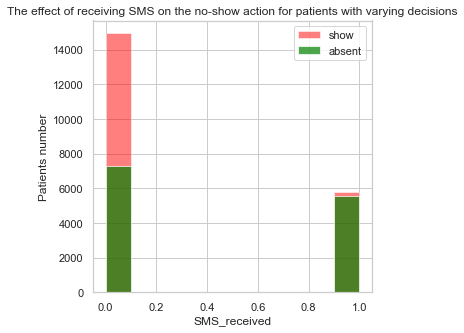

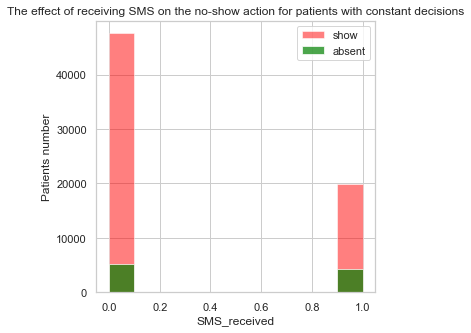

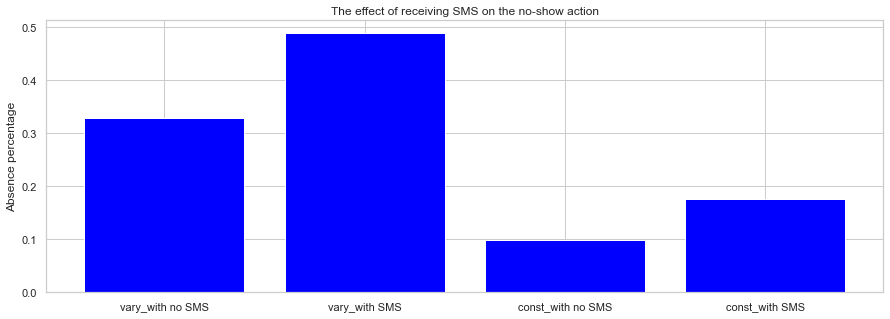

In [53]:
vary_show = df_vary[df_vary["No-show"] == "No"]
vary_absent = df_vary[df_vary["No-show"] == "Yes"]
const_show = df_const[df_const["No-show"] == "No"]
const_absent = df_const[df_const["No-show"] == "Yes"]


def Histogram(group1, group2, studied, title):
    plt.figure(figsize=(5,5))
    plt.hist(group1[studied], color="red", alpha=0.5, label="show")
    plt.hist(group2[studied], color="green", alpha=0.7, label="absent")
    plt.legend()
    plt.xlabel(studied)
    plt.ylabel("Patients number")
    plt.title(title)
    plt.show()


#figure 1

Histogram(vary_show, vary_absent, "SMS_received",
          "The effect of receiving SMS on the no-show action for patients with varying decisions")

#figure 2

Histogram(const_show, const_absent, "SMS_received",
          "The effect of receiving SMS on the no-show action for patients with constant decisions")

#figure 3

vary_absent_percent_with_no_SMS = vary_absent[vary_absent["SMS_received"] == 0].shape[0]/(vary_absent
[vary_absent["SMS_received"] == 0].shape[0] + vary_show[vary_show["SMS_received"] == 0].shape[0])

vary_absent_percent_with_SMS = vary_absent[vary_absent["SMS_received"] == 1].shape[0]/(vary_absent
[vary_absent["SMS_received"] == 1].shape[0] + vary_show[vary_show["SMS_received"] == 1].shape[0])

const_absent_percent_with_no_SMS = const_absent[const_absent["SMS_received"] == 0].shape[0]/(const_absent
[const_absent["SMS_received"] == 0].shape[0] + const_show[const_show["SMS_received"] == 0].shape[0])

const_absent_percent_with_SMS = const_absent[const_absent["SMS_received"] == 1].shape[0]/(const_absent
[const_absent["SMS_received"] == 1].shape[0] + const_show[const_show["SMS_received"] == 1].shape[0])

plt.figure(figsize=(15, 5))
plt.bar(["vary_with no SMS", "vary_with SMS", "const_with no SMS","const_with SMS"],
[vary_absent_percent_with_no_SMS, vary_absent_percent_with_SMS, const_absent_percent_with_no_SMS,
const_absent_percent_with_SMS], color="blue")
plt.ylabel("Absence percentage")
plt.title("The effect of receiving SMS on the no-show action")
plt.show()

Most patients did not receive SMSs. Absence percentages tend to be higher when an SMS is received in both patients groups those with constant decisions and those with varying ones, which is weird. Also, Absence percentages tend to be highly higher in patients with varying decisions than those with constant decisions, which may reflect prsonal acceptability to the idea of absence.

### What is the effect of having a scholarship on the no-show action?

> We have shown before that there is no change in sholarship status for the same patient upon different appointments. Therefore, it is logically accepted to remove the "PatientId" duplicats from the constant-decision group, while keeping it in the varying-decision group during our study.

In [54]:
df_const_1 = df_const.drop_duplicates(subset=["PatientId"])
#the following line is written for use in other studies not the no-show behaviour
df_vary_1 = df_vary.drop_duplicates(subset=["PatientId"])

In [55]:
const_show_1 = df_const_1[df_const_1["No-show"] == "No"]
const_absent_1 = df_const_1[df_const_1["No-show"] == "Yes"]

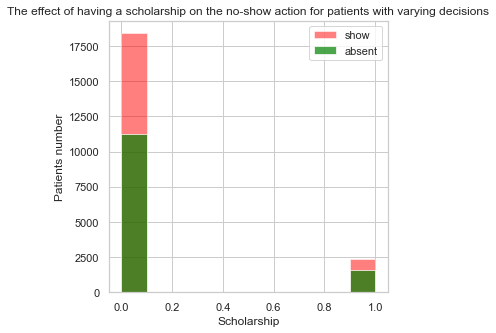

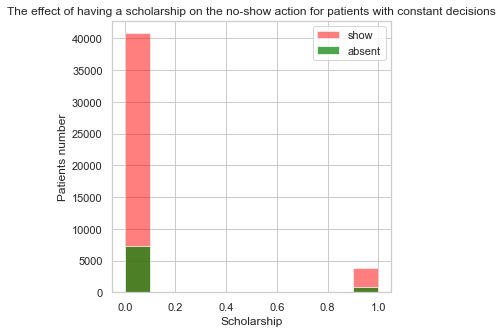

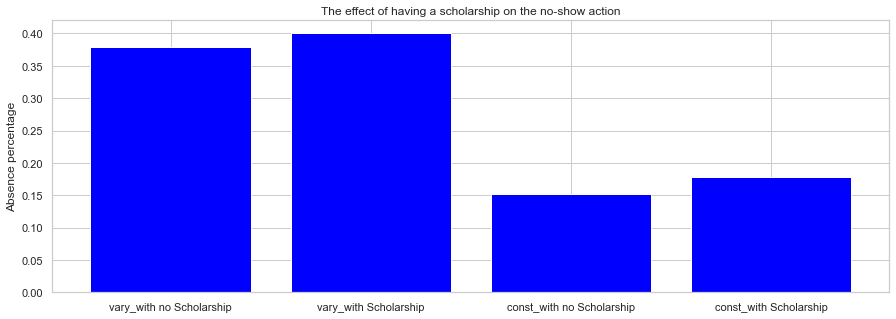

In [56]:
#figure 1

Histogram(vary_show, vary_absent, "Scholarship",
          "The effect of having a scholarship on the no-show action for patients with varying decisions")

#figure 2

Histogram(const_show_1, const_absent_1, "Scholarship",
          "The effect of having a scholarship on the no-show action for patients with constant decisions")

#figure 3

vary_absent_percent_with_no_scholarship = vary_absent[vary_absent["Scholarship"] == 0].shape[0]/(vary_absent
[vary_absent["Scholarship"] == 0].shape[0] + vary_show[vary_show["Scholarship"] == 0].shape[0])

vary_absent_percent_with_scholarship = vary_absent[vary_absent["Scholarship"] == 1].shape[0]/(vary_absent
[vary_absent["Scholarship"] == 1].shape[0] + vary_show[vary_show["Scholarship"] == 1].shape[0])

const_absent_percent_with_no_scholarship = const_absent_1[const_absent_1["Scholarship"] == 0].shape[0]/(const_absent_1
[const_absent_1["Scholarship"] == 0].shape[0] + const_show_1[const_show_1["Scholarship"] == 0].shape[0])

const_absent_percent_with_scholarship = const_absent_1[const_absent_1["Scholarship"] == 1].shape[0]/(const_absent_1
[const_absent_1["Scholarship"] == 1].shape[0] + const_show_1[const_show_1["Scholarship"] == 1].shape[0])

plt.figure(figsize=(15, 5))
plt.bar(["vary_with no Scholarship", "vary_with Scholarship", "const_with no Scholarship","const_with Scholarship"],
[vary_absent_percent_with_no_scholarship, vary_absent_percent_with_scholarship,
const_absent_percent_with_no_scholarship, const_absent_percent_with_scholarship], color="blue")
plt.ylabel("Absence percentage")
plt.title("The effect of having a scholarship on the no-show action")
plt.show()

Most patients do not have health cover scholarship. Absence is slightly more common in patients with scholarships in both patients groups, i.e., constant and varying-decisions groups.

### What is the effect of alcoholism on the no-show action?

> As discussed before, we will remove the "PatientId" duplicats from the constant-decision group, while keeping it in the varying-decision group during studying the effect of alcoholism.

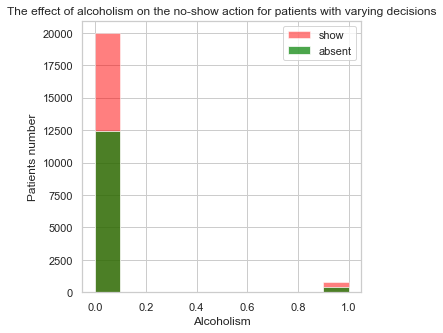

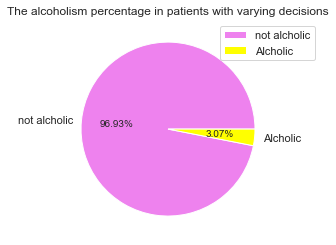

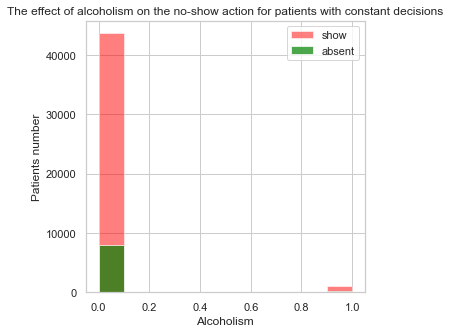

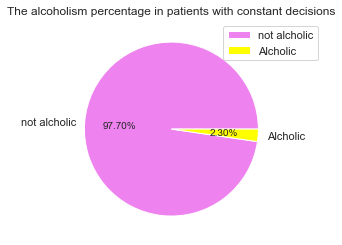

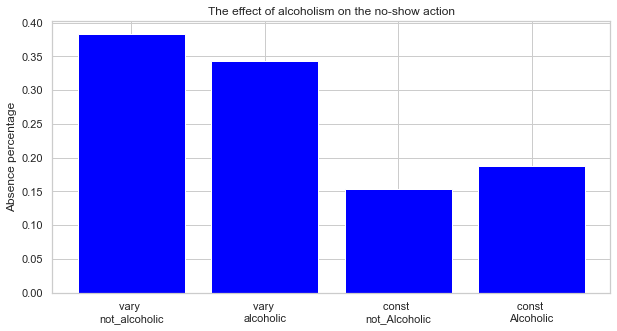

In [57]:
#figure 1

Histogram(vary_show, vary_absent, "Alcoholism",
          "The effect of alcoholism on the no-show action for patients with varying decisions")

#figure 2, we will use df_vary_1 with no PatientId duplicates to see the alcholism percentage among patients

plt.pie((df_vary_1[df_vary_1["Alcoholism"] == 0].shape[0], df_vary_1[df_vary_1["Alcoholism"] == 1].shape[0]),
colors=["violet", "yellow"], labels=["not alcholic", "Alcholic"], autopct='%.2f%%')
plt.legend(bbox_to_anchor=(1.2,1), loc="upper right")
plt.title("The alcoholism percentage in patients with varying decisions")
plt.show()

#figure 3

Histogram(const_show_1, const_absent_1, "Alcoholism",
          "The effect of alcoholism on the no-show action for patients with constant decisions")

#figure 4

plt.pie((df_const_1[df_const_1["Alcoholism"] == 0].shape[0], df_const_1[df_const_1["Alcoholism"] == 1].shape[0]),
colors=["violet", "yellow"], labels=["not alcholic", "Alcholic"], autopct='%.2f%%')
plt.legend(bbox_to_anchor=(1.2,1), loc="upper right")
plt.title("The alcoholism percentage in patients with constant decisions")
plt.show()

#figure 5

vary_absent_percent_not_alcoholic = vary_absent[vary_absent["Alcoholism"] == 0].shape[0]/(vary_absent
[vary_absent["Alcoholism"] == 0].shape[0] + vary_show[vary_show["Alcoholism"] == 0].shape[0])

vary_absent_percent_alcoholic = vary_absent[vary_absent["Alcoholism"] == 1].shape[0]/(vary_absent
[vary_absent["Alcoholism"] == 1].shape[0] + vary_show[vary_show["Alcoholism"] == 1].shape[0])

const_absent_percent_not_alcoholic = const_absent_1[const_absent_1["Alcoholism"] == 0].shape[0]/(const_absent_1
[const_absent_1["Alcoholism"] == 0].shape[0] + const_show_1[const_show_1["Alcoholism"] == 0].shape[0])

const_absent_percent_alcoholic = const_absent_1[const_absent_1["Alcoholism"] == 1].shape[0]/(const_absent_1
[const_absent_1["Alcoholism"] == 1].shape[0] + const_show_1[const_show_1["Alcoholism"] == 1].shape[0])

plt.figure(figsize=(10, 5))
plt.bar(["vary \nnot_alcoholic", "vary \nalcoholic", "const \nnot_Alcoholic","const \nAlcoholic"],
[vary_absent_percent_not_alcoholic, vary_absent_percent_alcoholic,
const_absent_percent_not_alcoholic, const_absent_percent_alcoholic], color="blue")
plt.ylabel("Absence percentage")
plt.title("The effect of alcoholism on the no-show action")
plt.show()

Most patients do not drink alcohol. Alcoholism is slightly more common in patients with varying decisions. However, while, in the varying-decisions group, absence is less common among alcoholics than normal ones, a reverse observation is found in the constant-decisions group, where the no-show is more common among alcoholics.

### What is the effect of age on the no-show action?

Age is changing across the database for the same patient "PatientId", so we will use the original database for both groups, i.e., df_vary and df_const and their corresponding show/no-show databases during our study of age effect on the no-show action.

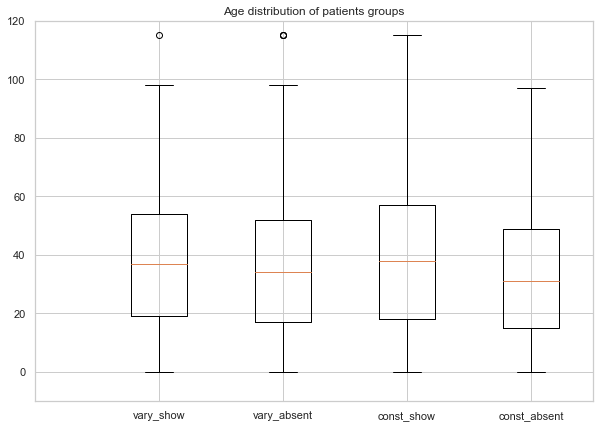

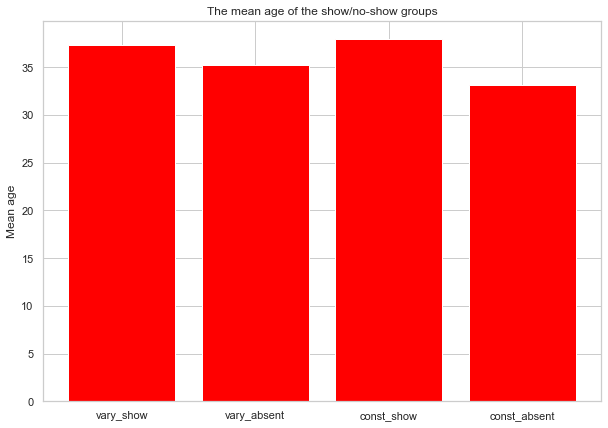

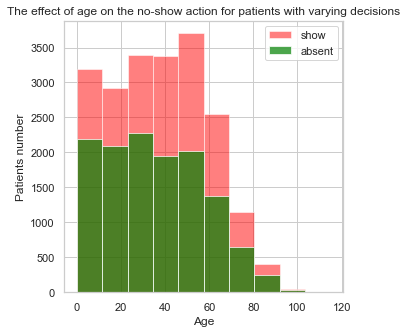

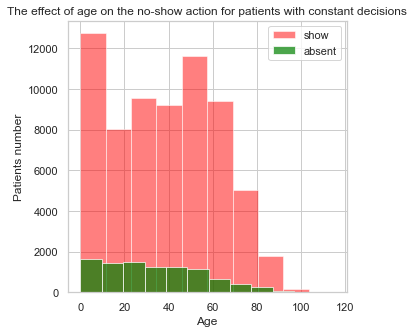

In [58]:
#figure 1

sns.set(style= "whitegrid")
plt.figure(figsize=(10, 7))
plt.boxplot(x=[vary_show["Age"], vary_absent["Age"], const_show["Age"], const_absent["Age"]])
plt.xticks(np.arange(5),["", "vary_show", "vary_absent", "const_show","const_absent"])
plt.title("Age distribution of patients groups")
plt.ylim((-10,120))
plt.show()

#figure 2

plt.figure(figsize=(10, 7))
plt.bar(["vary_show", "vary_absent", "const_show","const_absent"],
[vary_show["Age"].mean(), vary_absent["Age"].mean(), const_show["Age"].mean(), const_absent["Age"].mean()],
color="red")
plt.ylabel("Mean age")
plt.title("The mean age of the show/no-show groups")
plt.show()

#figure 3

Histogram(vary_show, vary_absent, "Age",
          "The effect of age on the no-show action for patients with varying decisions")

#figure 4

Histogram(const_show, const_absent, "Age",
          "The effect of age on the no-show action for patients with constant decisions")

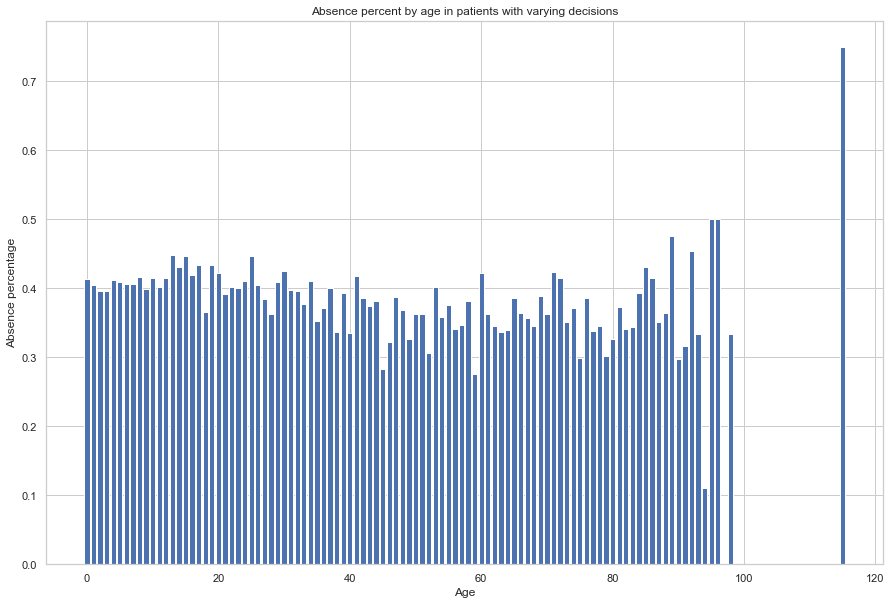

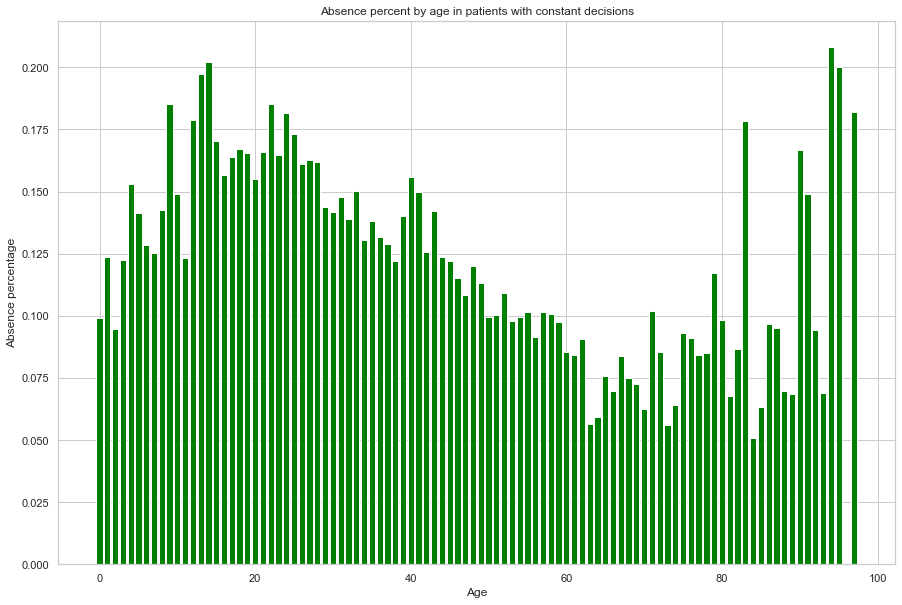

In [59]:
#figure 5

v_absent_age_count = vary_absent.groupby("Age")["PatientId"].count()
v_show_age_count = vary_show.groupby("Age")["PatientId"].count()

dict_1={}
for i in v_absent_age_count.keys():
    for j in v_show_age_count.keys():
        if i == j:
            dict_1[i] = v_absent_age_count[i]/(v_absent_age_count[i]+v_show_age_count[i])
        else:
            continue
            
vary_age_absence_percentage = pd.DataFrame.from_dict(dict_1, orient="index", columns = ["Percentage"])

plt.figure(figsize=(15, 10))
plt.bar(vary_age_absence_percentage.index, vary_age_absence_percentage["Percentage"])
plt.xlabel("Age")
plt.ylabel("Absence percentage")
plt.title("Absence percent by age in patients with varying decisions")
plt.show()

#figure 6
c_absent_age_count = const_absent.groupby("Age")["PatientId"].count()
c_show_age_count = const_show.groupby("Age")["PatientId"].count()

dict_2={}
for o in c_absent_age_count.keys():
    for p in c_show_age_count.keys():
        if o == p:
            dict_2[o] = c_absent_age_count[o]/(c_absent_age_count[o]+c_show_age_count[o])
        else:
            continue

constant_age_absence_percentage = pd.DataFrame.from_dict(dict_2, orient="index", columns = ["Percentage"])
plt.figure(figsize=(15, 10))
plt.bar(constant_age_absence_percentage.index, constant_age_absence_percentage["Percentage"], color="green")
plt.xlabel("Age")
plt.ylabel("Absence percentage")
plt.title("Absence percent by age in patients with constant decisions")
plt.show()

The average ages of all patients' groups are quite close. The distribution of ages appears similar across all groups. Absence percentages among the varying-decisions group are very close, i.e., no age-absence relation can be deduced, while they show two peaks around twenties and near nineties in the constant-decisions group, i.e., patients of these ages are the most absent. 

<a id='conclusions'></a>
## Conclusions

> <ol>
    <li> Patients with varying decisions practice far higher no-show actions than those with constant decisions.
    <li> Most patients did not receive SMSs, do not have health covers, and do not drink alcohol.
    <li> <ul>
            <li> Abnormally patients who received SMSs or those are under health cover are more absent than their opposites.
            <li> Reconsideration of health cover policies and the criteria that determine who is covered is proposed.
            <li> Improvement of the SMS campaign is also proposed
        </ul>
     <li> Alcoholism is slightly more common in the varying-decisions group, which shows a lower absence percentage among alcoholics. 
     <li> In the constant-decisions group, absence is more common among alcoholics
     <li> No age-absence relation can be drawn for the varying-decision group, while around-twenties and near-nineties patients are the most absent among the constant-decision group, so some effort, targeting these ages, could be devoted to improve their show action. 